**Logistic Regression Project**

In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes

'Age': cutomer age in years

'Area Income': Avg. Income of geographical area of consumer

'Daily Internet Usage': Avg. minutes a day consumer is on the internet

'Ad Topic Line': Headline of the advertisement

'City': City of consumer

'Male': Whether or not consumer was male

'Country': Country of consumer

'Timestamp': Time at which consumer clicked on Ad or closed window

'Clicked on Ad': 0 or 1 indicated clicking on Ad

**Import Libraries**

Import a few libraries we  think we will need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**

Read in the advertising.csv file and set it to a data frame called ad_df.

In [ ]:
ad_df = pd.read_csv('/content/advertising.csv')
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Use info and describe() on ad_df


In [ ]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**We observe the following from the Age column:**

Oldest person: 61 Years

Youngest person: 19 Years

Average age: 36 Years

Even though the column ‘Clicked on Ad’ holds numeric values, it actually represents the label whether the user clicked the ad or not. Therefore we will consider it as a categorical column and use this as the predicting label.

**Exploratory Data Analysis (EDA)**

Let’s explore the dataset further with the correlation matrix represented in a heatmap.

Correlation describes the linear dependency between variables ranging from -1 to +1.

Where +1 implies a strong positive correlation, -1 indicates a strong negative correlation.

A correlation of 0 suggests these two variables are not linearly dependent.

Notably, the diagonal values in the correlation matrix are always one because it represents the correlation of a variable with itself.

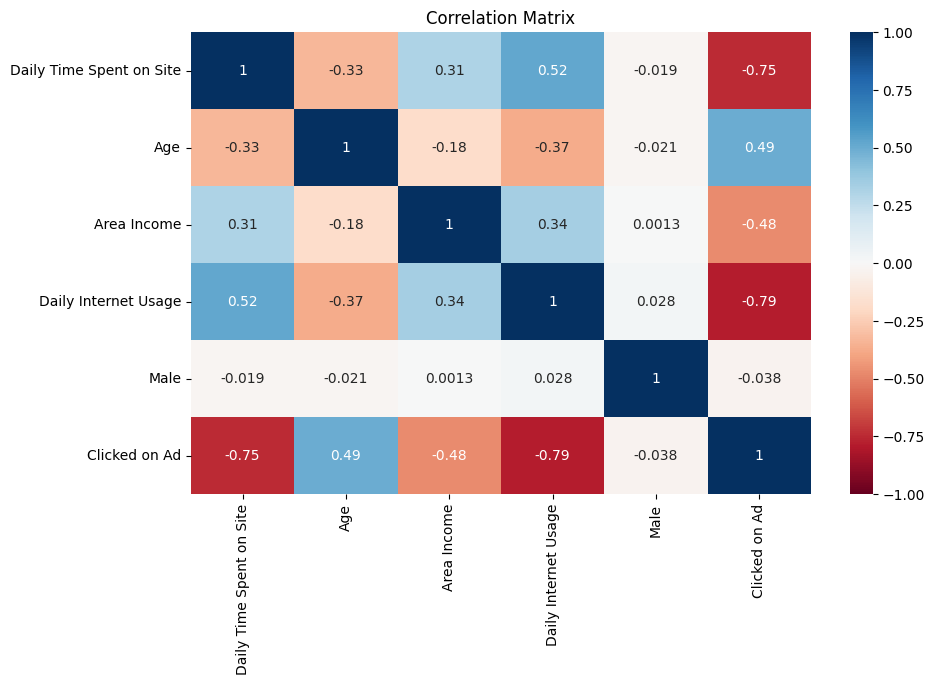

In [ ]:
numeric_df = ad_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
s = sns.heatmap(corr_matrix,
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

In our correlation heatmap, it is visible that the click outcome is inversely correlated with the amount of time an individual spends on the site and the internet in a reverse direction. So let’s take a look at these inter-variable relationship pairs.

In the left graphs, we observe that those who spend longer time on the site are less likely to click on the ads. We also see that those who use more internet are also less likely to click on the ads.

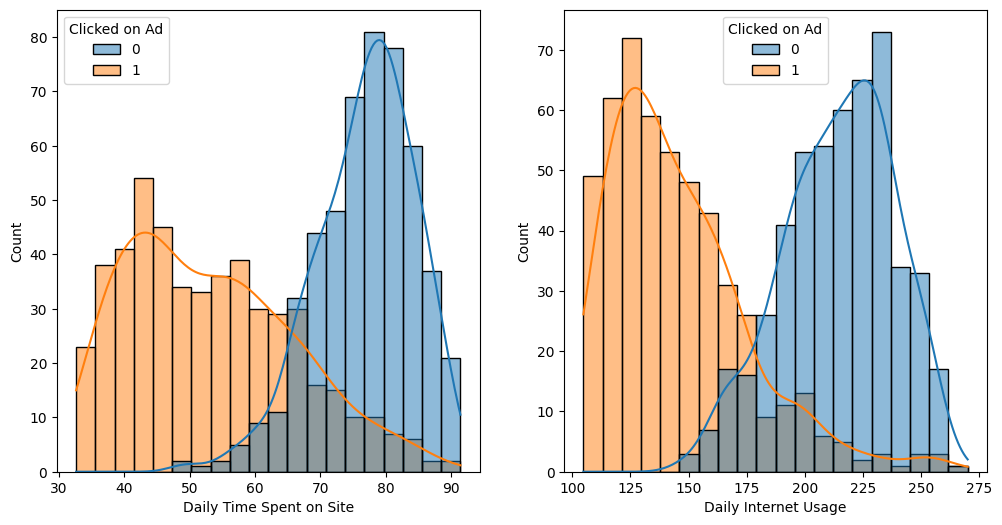

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# plt.figure(figsize=(12, 8))
sns.histplot(data=ad_df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=ad_df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

plt.show()

Let’s see how age influences the ad click event.
Apparently, the younger population is less attracted to the ads.

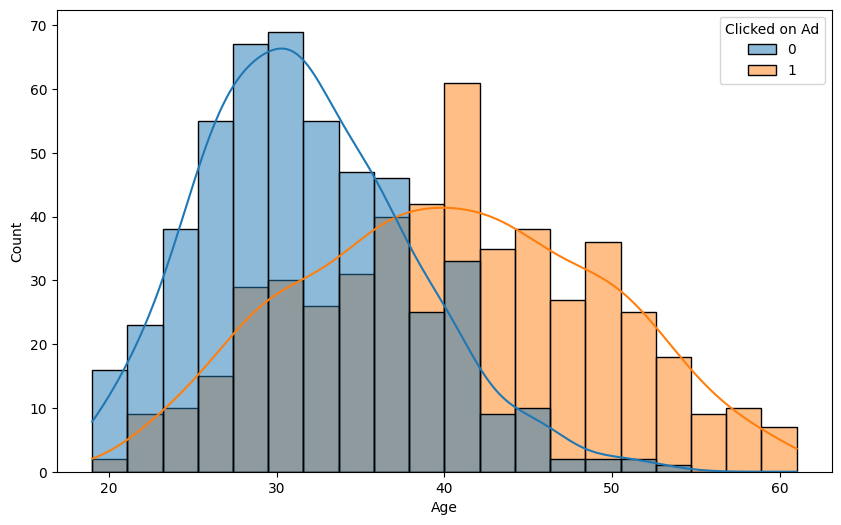

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=ad_df, x='Age', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

**Model Building**

We are going to use the logistic regression model because it’s easy to implement and very efficient to train. I’d suggest taking logistic regression as a benchmark, experimenting with more complex algorithms, and checking the improvement rooms.

We will consider the following features for our model because, from the correlation matrix, we saw that these are the influencing factors for predicting advertisement clicks.

**Daily Time Spent on Site**

Age

Area Income

Daily Internet Usage

Male (gender)

Now, we know the steps. First, select the feature columns and the label then split the dataset into random train and test subsets with scikit-learn’s handy train_test_split function. After that, build and train a machine learning model.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = ad_df.drop(labels=['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)
y = ad_df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
lr_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



**Conclusion**

As we see in terms of performance logistic regression did very well and achieved around 90% accuracy.

In general, we can say that with these five features, we can predict the action of an advertisement viewer. And perhaps this gives a sense of direction to think about how we can engage our audience better.